# Part 1: B-F Simulations

## Summary

### Goals: 
1. show that functions work
2. understand the situations in which shrinking helps. 

### Situations to highlight. 
* high variance in B's (or inversely high covariace)(disimilar effects.. does BF do covariance?)
* increasing noise/signal ratio
* large p/n
* large q/n
* large q/p


## Detailed Methods





#### Linear Models. 



- ols

- ols.optimal

- ols.cw.insample..
Just uses Q^ as 

- ols.cw.gcv

- ols.cor

- ridge

- ridge.cw.gcv



#### Performance Measures

1. average(across Y) prediction MSE
2. average(across Y) prediction correlation (more intuitive)
3. average(across Y) estimation error
4. ... 

 

## Example Data


* Example Y variables. 
* Example X variable. 
* Histogram of B's... and Covariance  
* Histogram of E's...
* Heat Map Covariance
* 




In [2]:
%load_ext rmagic

/Library/Python/2.7/site-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>


Attaching package: ‘pracma’

The following object is masked from ‘package:car’:

    logit

Loading required package: Matrix

Attaching package: ‘Matrix’

The following objects are masked from ‘package:pracma’:

    expm, lu, tril, triu

Loading required package: foreach
foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com
Loaded glmnet 2.0-2



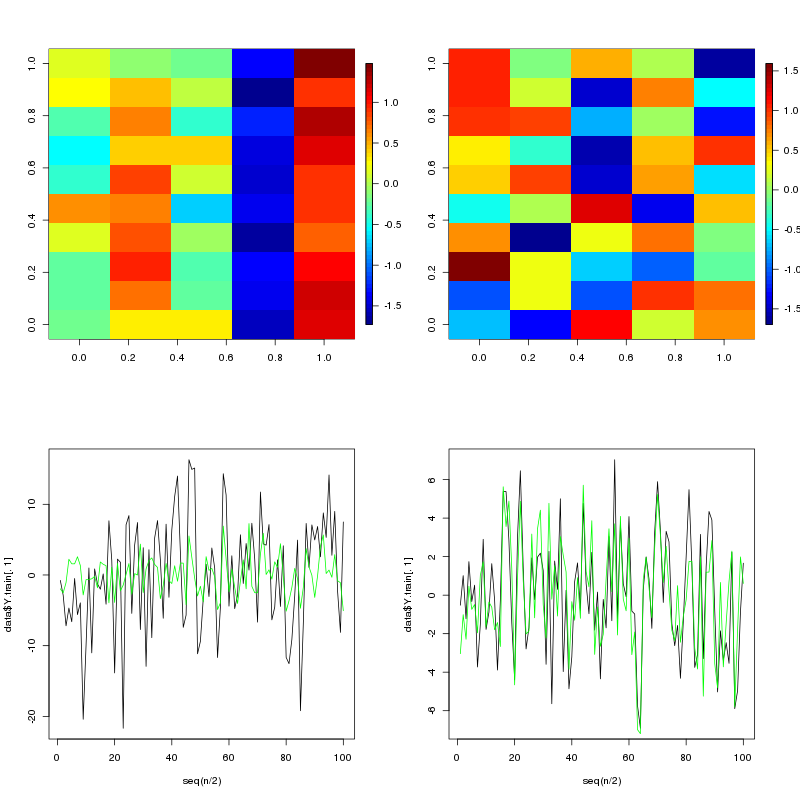

In [6]:
%%R -h 800 -w 800
library('fields')
source('Scripts_LinearModels.R')
modellist<-c("ols","ols.cw.gcv","ridge","ridge.cw.gcv")
qq=10
pp=5
nn=200



par(mfrow=c(2,2))

params=list(n=nn,p=pp,q=qq,bsig=.1,SNR=1,modellist<-modellist)
data<-generate_data(params)
image.plot(data$B) 

params=list(n=nn,p=pp,q=qq,bsig=10,SNR=1,modellist<-modellist)
data<-generate_data(params)
image.plot(data$B) ### shows covariance in beta's.. 
# Print F on their too.. X

params=list(n=nn,p=pp,q=qq,bsig=.1,SNR=.1,modellist<-modellist)
data<-generate_data(params)
plot(seq(n/2),data$Y.train[,1],type='l')
lines(seq(n/2),data$X.train%*%data$B[,1],type='l',col='green')


params=list(n=nn,p=pp,q=qq,bsig=.1,SNR=2,modellist<-modellist)
data<-generate_data(params)
plot(seq(n/2),data$Y.train[,1],type='l')
lines(seq(n/2),data$X.train%*%data$B[,1],type='l',col='green')

## Simulate (Generate and append results)

In [21]:
%%R
if(!file.exists('BF_Sims.Rda')){
    #save# first time save empty
    est.mse<-c(0) #probably want per q too..!
    pred.mse<-c(0)
    pred.cor<-c(0)
    est.mse2<-c(0)
    succeed<-c(0)
    params$modellist
    model="ols"
    df<-data.frame(model,params$n,params$p,params$q,params$bsig,params$SNR,est.mse,pred.mse,pred.cor,est.mse2,succeed)
    modellist<-c("ols","ols.cw.gcv","ridge","ridge.cw.gcv")
    levels(df$model)=modellist
    save(df,file="BF_Sims.Rda")
    print('overwriting')
}

In [7]:
%%R
library('ggplot2')
library('MASS')
library('car')
source('Scripts_LinearModels.R')


# Generate the following simulations #
bsig<-c(.01,.1,.5,1,2)
SNR<-c(.01,.1,.5,1,2)
n<-c(200,400)
p<-c(11,21,51)
q<-c(5,10,20,50)
modellist<-c("ols","ols.cw.gcv","ridge","ridge.cw.gcv")

########
nsims=50

for (qq in q){
    for (pp in p){
        for (nn in n){
            for (SSNR in SNR){
                for (bbsig in bsig){
                    params=list(n=nn,p=pp,q=qq,bsig=bbsig,SNR=SSNR,modellist<-modellist)
                    load("BF_Sims.Rda") #load
                    dfnew<-simulation(params,nsims)
                    df<-rbind(df,dfnew) #append
                    save(df,file="BF_Sims.Rda")#re-save
                }
            }
        }
    }
}


KeyboardInterrupt: 

In [4]:
%%R
source('Scripts_LinearModels.R')
#### for debugging
nn=200
pp=51
qq=10
bbsig=0.1
SSNR=0.1
nsims=1
modellist<-c("ols","ols.cw.gcv","ridge","ridge.cw.gcv")
params=list(n=nn,p=pp,q=qq,bsig=bbsig,SNR=SSNR,modellist<-modellist)
#load("BF_Sims.Rda") #load
#dfnew<-simulation(params,nsims)
#dfnew

Use suppressPackageStartupMessages to eliminate package startup messages.

Attaching package: ‘pracma’

The following object is masked from ‘package:car’:

    logit

Loading required package: Matrix

Attaching package: ‘Matrix’

The following objects are masked from ‘package:pracma’:

    expm, lu, tril, triu

Loading required package: foreach
foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com
Loaded glmnet 2.0-2



###  Results: Average per Model Across Simulations

In [16]:
%%R
dim(df)

[1] 79201    11


Error in dev.off() : 
  QuartzBitmap_Output - unable to open file '/var/folders/h5/n0m4g__513d80_1dp1xsxrb40000gn/T/tmpD2nUgr/Rplots001.png'
Saving 11.1 x 11.1 in image


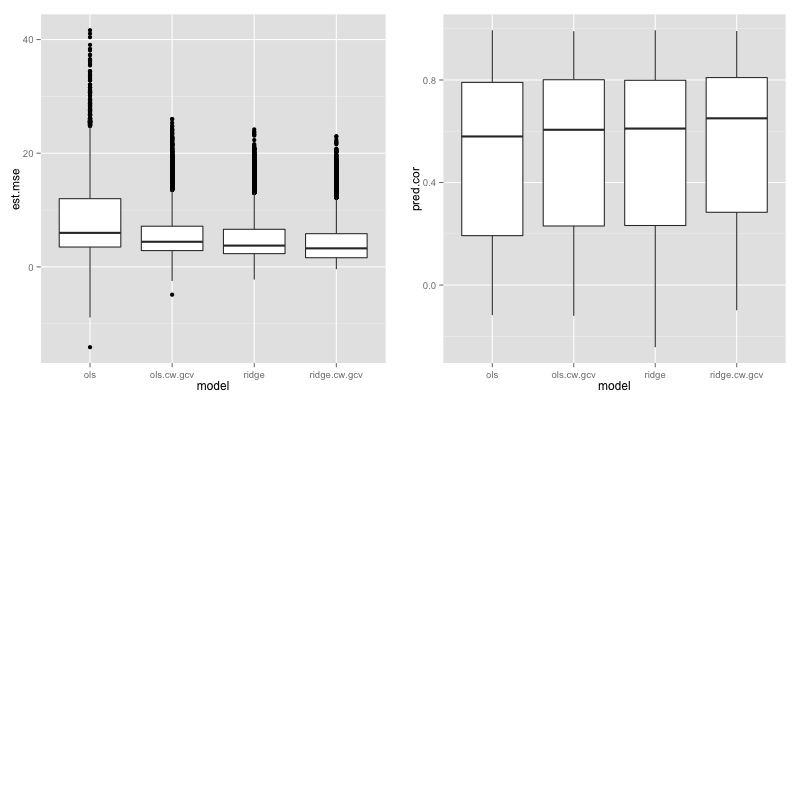

In [15]:
%%R -h 800 -w 800
library(gridExtra)
library(ggplot2)
load("BF_Sims.Rda")
df1 <- subset(df, params.p < params.q )
p1<-ggplot(data=df,aes(x=model,y=est.mse))+geom_boxplot()
p2<-ggplot(data=df,aes(x=model,y=pred.mse))+geom_boxplot()
#ylim1 = boxplot.stats(df1$pred.mse)$stats[c(1, 5)]
#p2<-p2+coord_cartesian(ylim = ylim1*1.05)

p3<-ggplot(data=df,aes(x=model,y=pred.cor))+geom_boxplot()
g<-grid.arrange(p1,p3, nrow = 2, ncol = 2)
ggsave('NewPlot2.png')
#p3

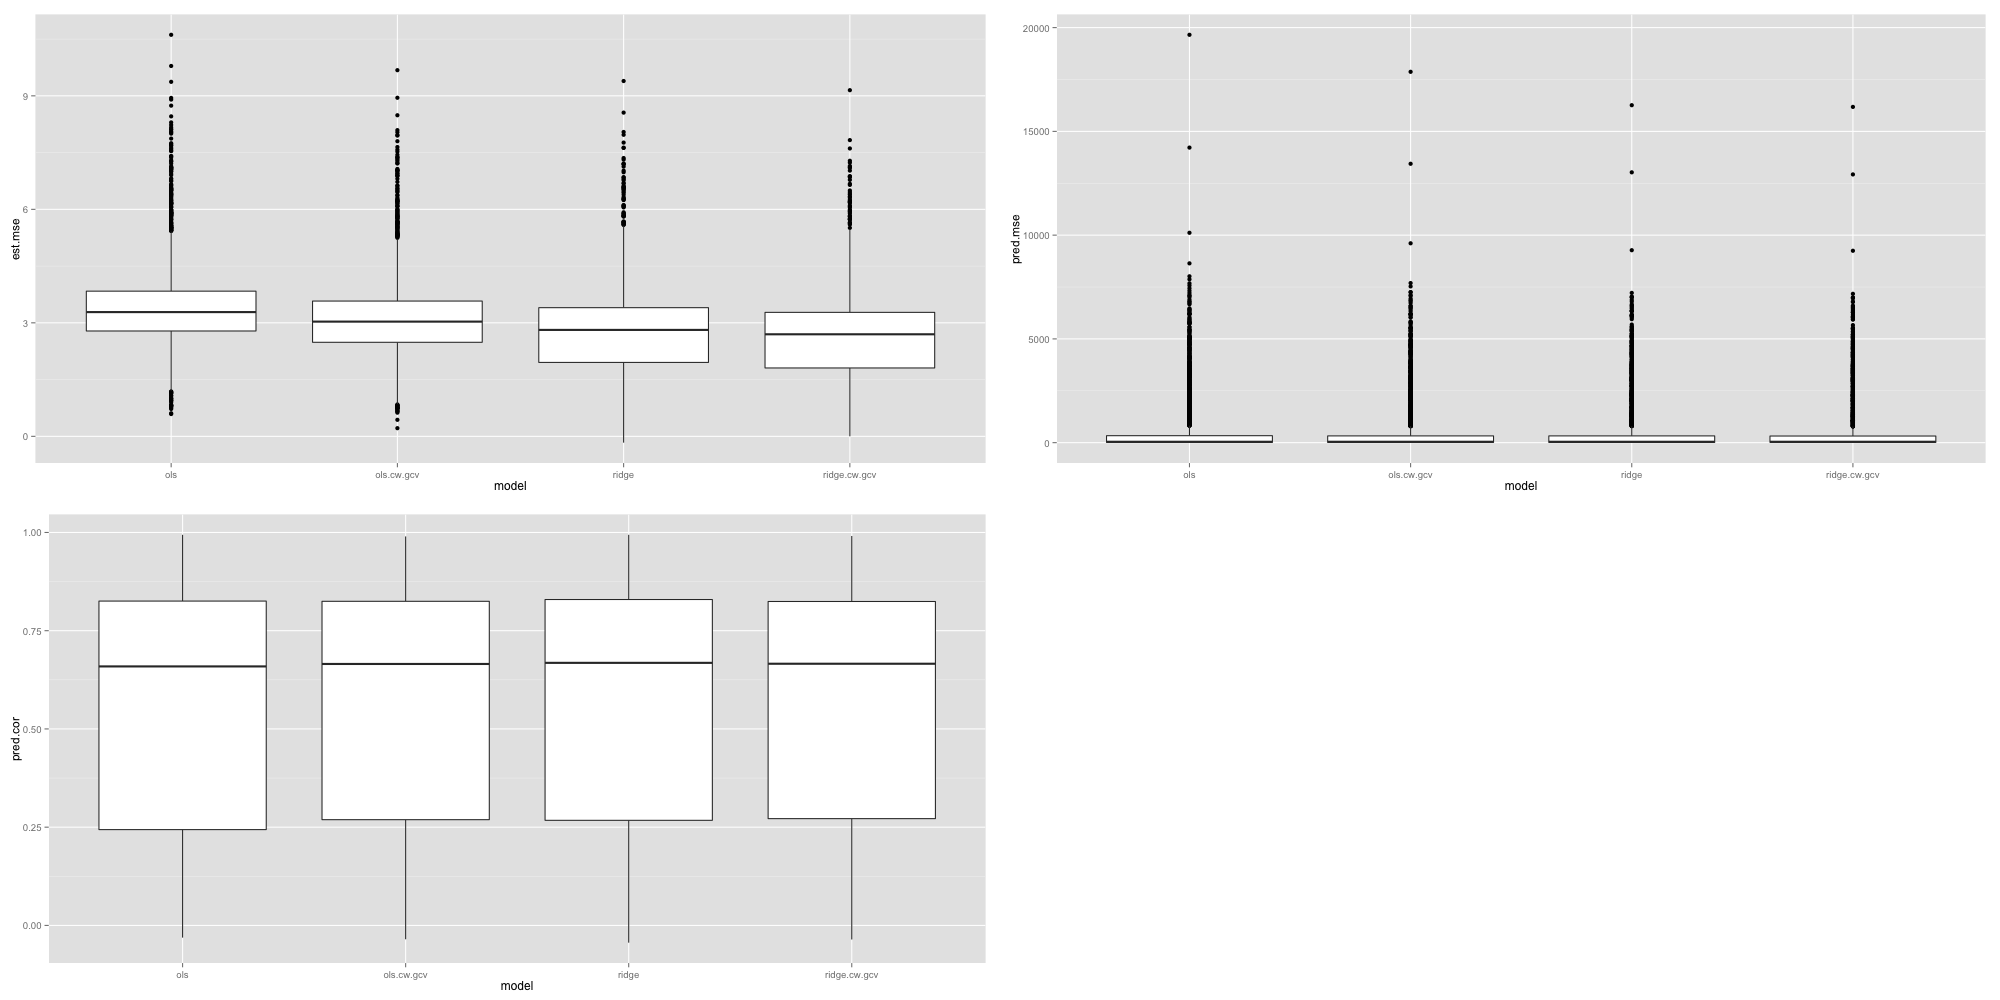

In [55]:
%%R -w 2000 -h 1000
df1 <- subset(df, params.p ==11& params.q==5 & params.bsig==.1 & params.SNR==.1 )#& params.SNR==0.5
df1 <- subset(df, params.p < params.q )#& params.SNR==0.5

p1<-ggplot(data=df1,aes(x=model,y=est.mse))+geom_boxplot()
p2<-ggplot(data=df1,aes(x=model,y=pred.mse))+geom_boxplot()
p3<-ggplot(data=df1,aes(x=model,y=pred.cor))+geom_boxplot()
grid.arrange(p1,p2,p3, nrow = 2, ncol = 2)

###  Results: by SNR

In [17]:
%%R
head(df)

          model params.n params.p params.q params.bsig params.SNR    est.mse
1           ols      100       10        5        0.10       0.10 0.00000000
2           ols      100       11        5        0.01       0.01 3.69485335
3    ols.cw.gcv      100       11        5        0.01       0.01 1.85679632
4         ridge      100       11        5        0.01       0.01 1.62031403
5  ridge.cw.gcv      100       11        5        0.01       0.01 0.07247604
21          ols      100       11        5        0.10       0.01 8.66122472
   pred.mse   pred.cor    est.mse2 succeed
1     0.000 0.00000000   0.0000000       0
2  3838.671 0.04625312  75.7045847       1
3  3077.088 0.11106586  14.1538131       1
4  3153.686         NA   2.9751474       1
5  3045.018 0.05141857   0.9651844       0
21 6633.126 0.06345670 328.0191313       1


In [77]:
%%R
#df1 <- subset(df, params.p > params.q & succeed==0)
#df1

NULL


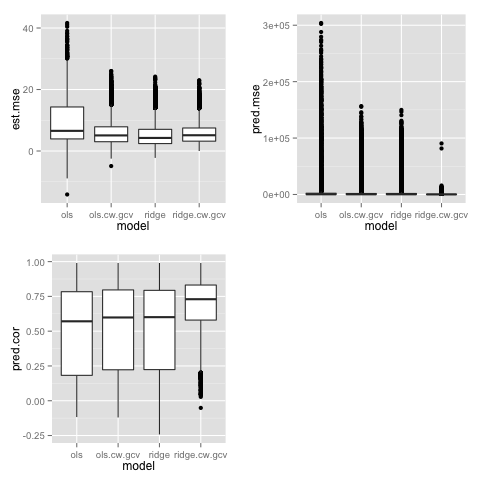

In [9]:
%%R
#df1 <- subset(df, params.p > params.q)
df1 <- subset(df, params.p > params.q & succeed==1)
p1<-ggplot(data=df1,aes(x=model,y=est.mse))+geom_boxplot()#+ylim(0,1)
p2<-ggplot(data=df1,aes(x=model,y=pred.mse))+geom_boxplot()#+ylim(0,1)
p3<-ggplot(data=df1,aes(x=model,y=pred.cor))+geom_boxplot()#+ylim(0,1)
grid.arrange(p1,p2,p3, nrow = 2, ncol = 2)

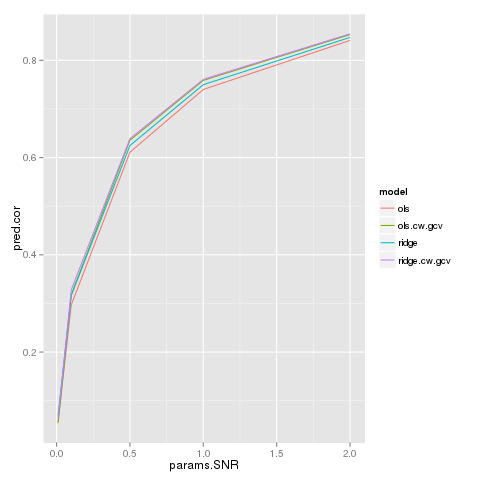

In [65]:
%%R
#df1 <- subset(df, params.p > params.q)
p1<-ggplot(data=df,aes(x=params.SNR,y=pred.cor,color=model))+ stat_summary(fun.y = mean, geom="line")
p1

In [59]:
%%R
df1 <- subset(df, params.p > params.q  & params.bsig==0.1)
head(df1)

          model params.n params.p params.q params.bsig params.SNR   est.mse
1           ols      100       10        5         0.1       0.10 0.0000000
21          ols      100       11        5         0.1       0.01 8.6612247
31   ols.cw.gcv      100       11        5         0.1       0.01 3.1320077
41        ridge      100       11        5         0.1       0.01 4.2357992
51 ridge.cw.gcv      100       11        5         0.1       0.01 0.6609289
26          ols      100       11        5         0.1       0.10 2.0708210
    pred.mse    pred.cor   est.mse2 succeed
1     0.0000  0.00000000   0.000000       0
21 6633.1257  0.06345670 328.019131       1
31 5493.0278  0.10993898  65.362098       1
41 5818.3357          NA  21.662781       1
51 5327.2843 -0.02051242   1.142231       0
26  253.9898  0.14552040 156.958809       1


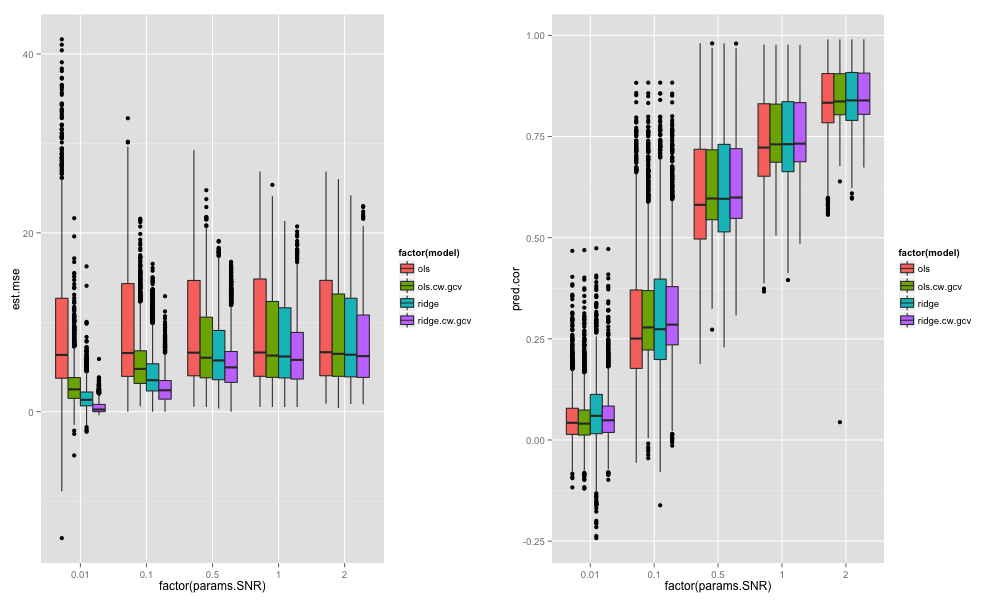

In [69]:
%%R -w 1000 -h 600
df1 <- subset(df, params.p > params.q  )
p1<-ggplot(data=df1,aes(x=factor(params.SNR),y=est.mse,fill = factor(model)))+geom_boxplot()
p3<-ggplot(data=df1,aes(x=factor(params.SNR),y=pred.cor,fill = factor(model)))+geom_boxplot()
grid.arrange(p1,p3, nrow = 1, ncol = 2)

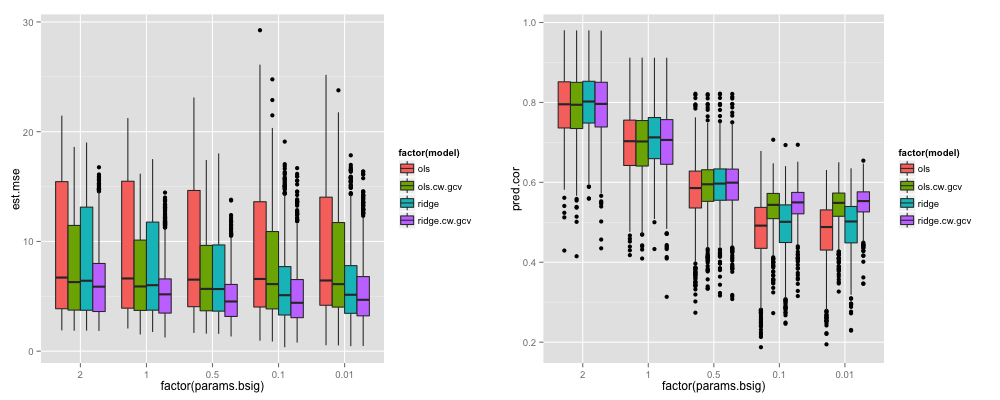

In [53]:
%%R -w 1000 -h 400
#df1 <- subset(df, params.p > params.q)
df1 <- subset(df, params.p > params.q & params.SNR==.5 & succeed==1)
#df1 <-df
df1$params.bsig<-factor(df1$params.bsig)
df1$params.bsig<-with(df1,factor(params.bsig, levels = rev(levels(params.bsig))))

p1<-ggplot(data=df1,aes(x=factor(params.bsig),y=est.mse,fill = factor(model)))+geom_boxplot()
p2<-ggplot(data=df1,aes(x=factor(params.bsig),y=pred.cor,fill = factor(model)))+geom_boxplot()
grid.arrange(p1,p2, nrow = 1, ncol = 2)

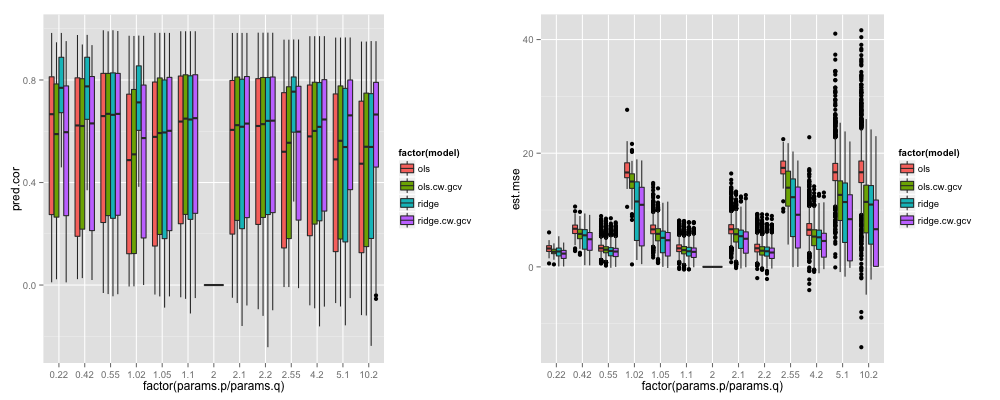

In [78]:
%%R -w 1000 -h 400
#df1 <- subset(df,params.n==200) #& params.bsig==0.1
df1<-df
p1<-ggplot(data=df1,aes(x=factor(params.p/params.q),y=pred.cor,fill = factor(model)))+geom_boxplot()
#df1 <- subset(df,params.n==400)
p2<-ggplot(data=df1,aes(x=factor(params.p/params.q),y=est.mse,fill = factor(model)))+geom_boxplot()
grid.arrange(p1,p2, nrow = 1, ncol = 2)

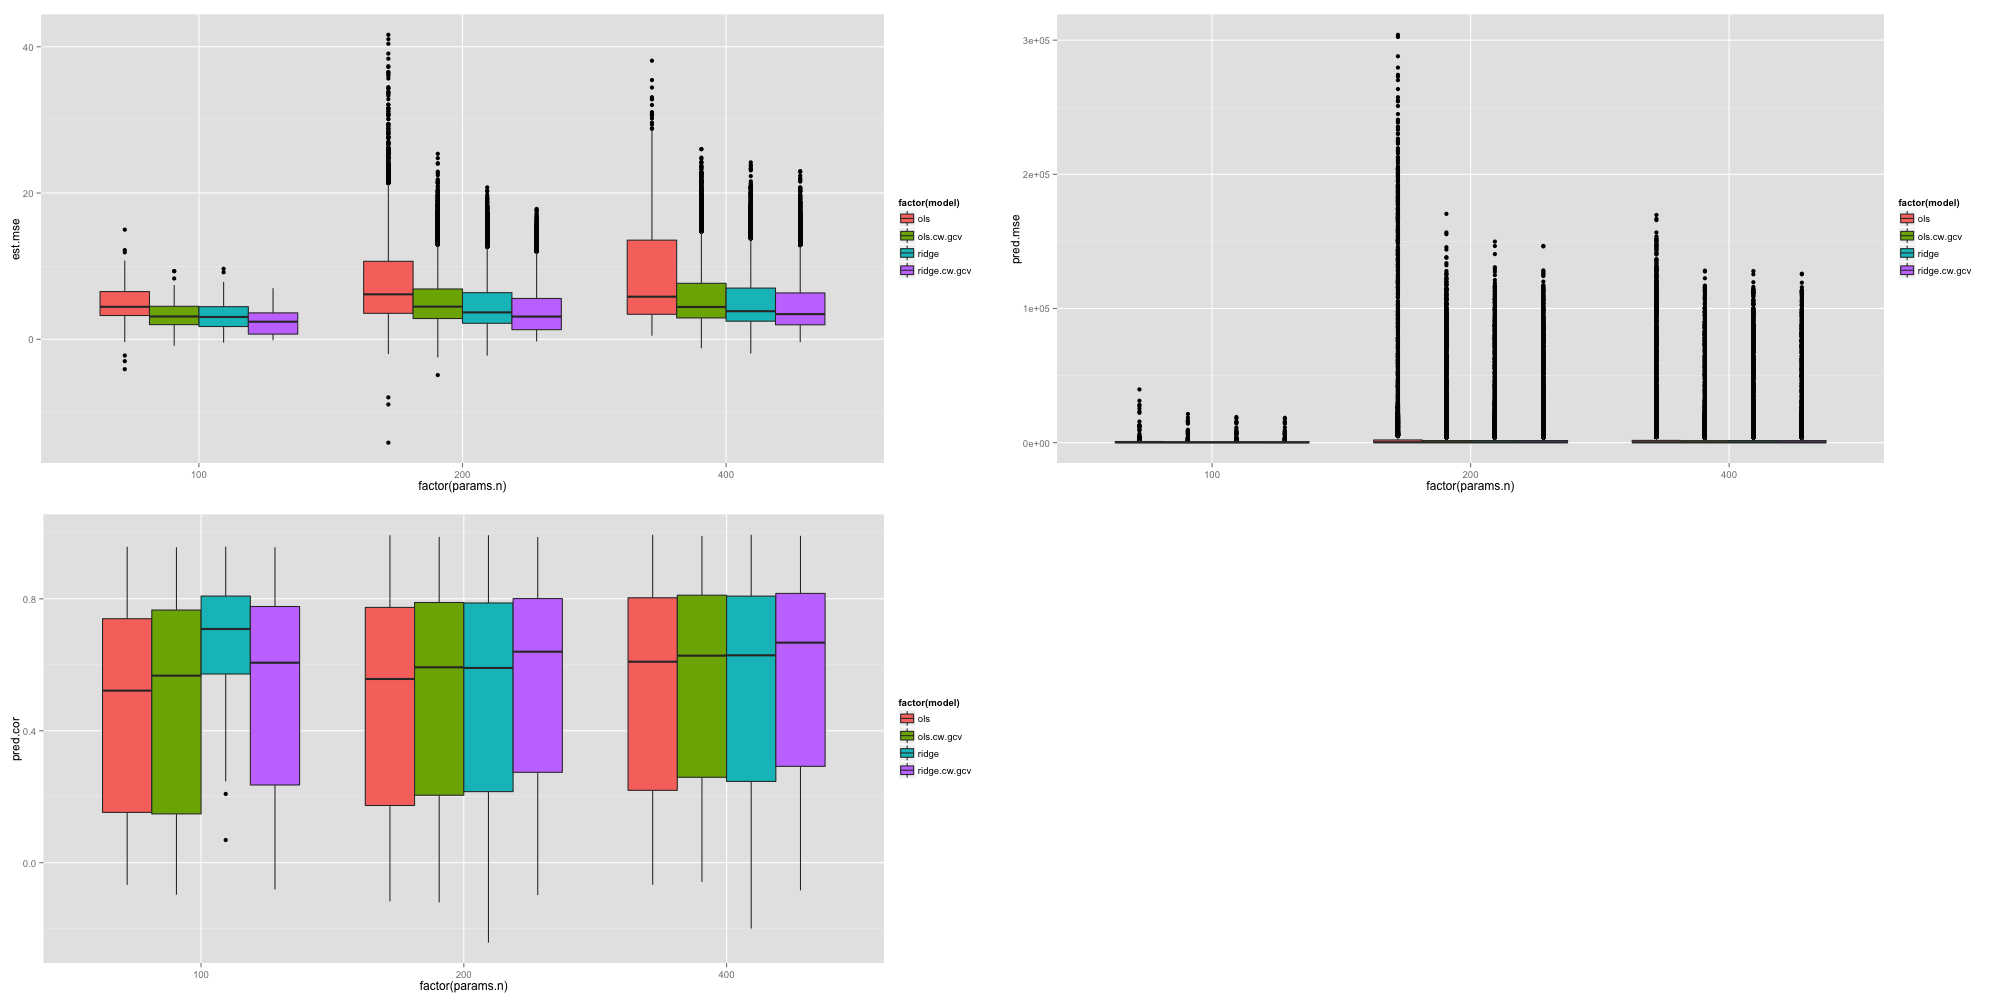

In [71]:
%%R -w 2000 -h 1000
df1 <- subset(df)
p1<-ggplot(data=df1,aes(x=factor(params.n),y=est.mse,fill = factor(model)))+geom_boxplot()
p2<-ggplot(data=df1,aes(x=factor(params.n),y=pred.mse,fill = factor(model)))+geom_boxplot()
p3<-ggplot(data=df1,aes(x=factor(params.n),y=pred.cor,fill = factor(model)))+geom_boxplot()
grid.arrange(p1,p2,p3, nrow = 2, ncol = 2)

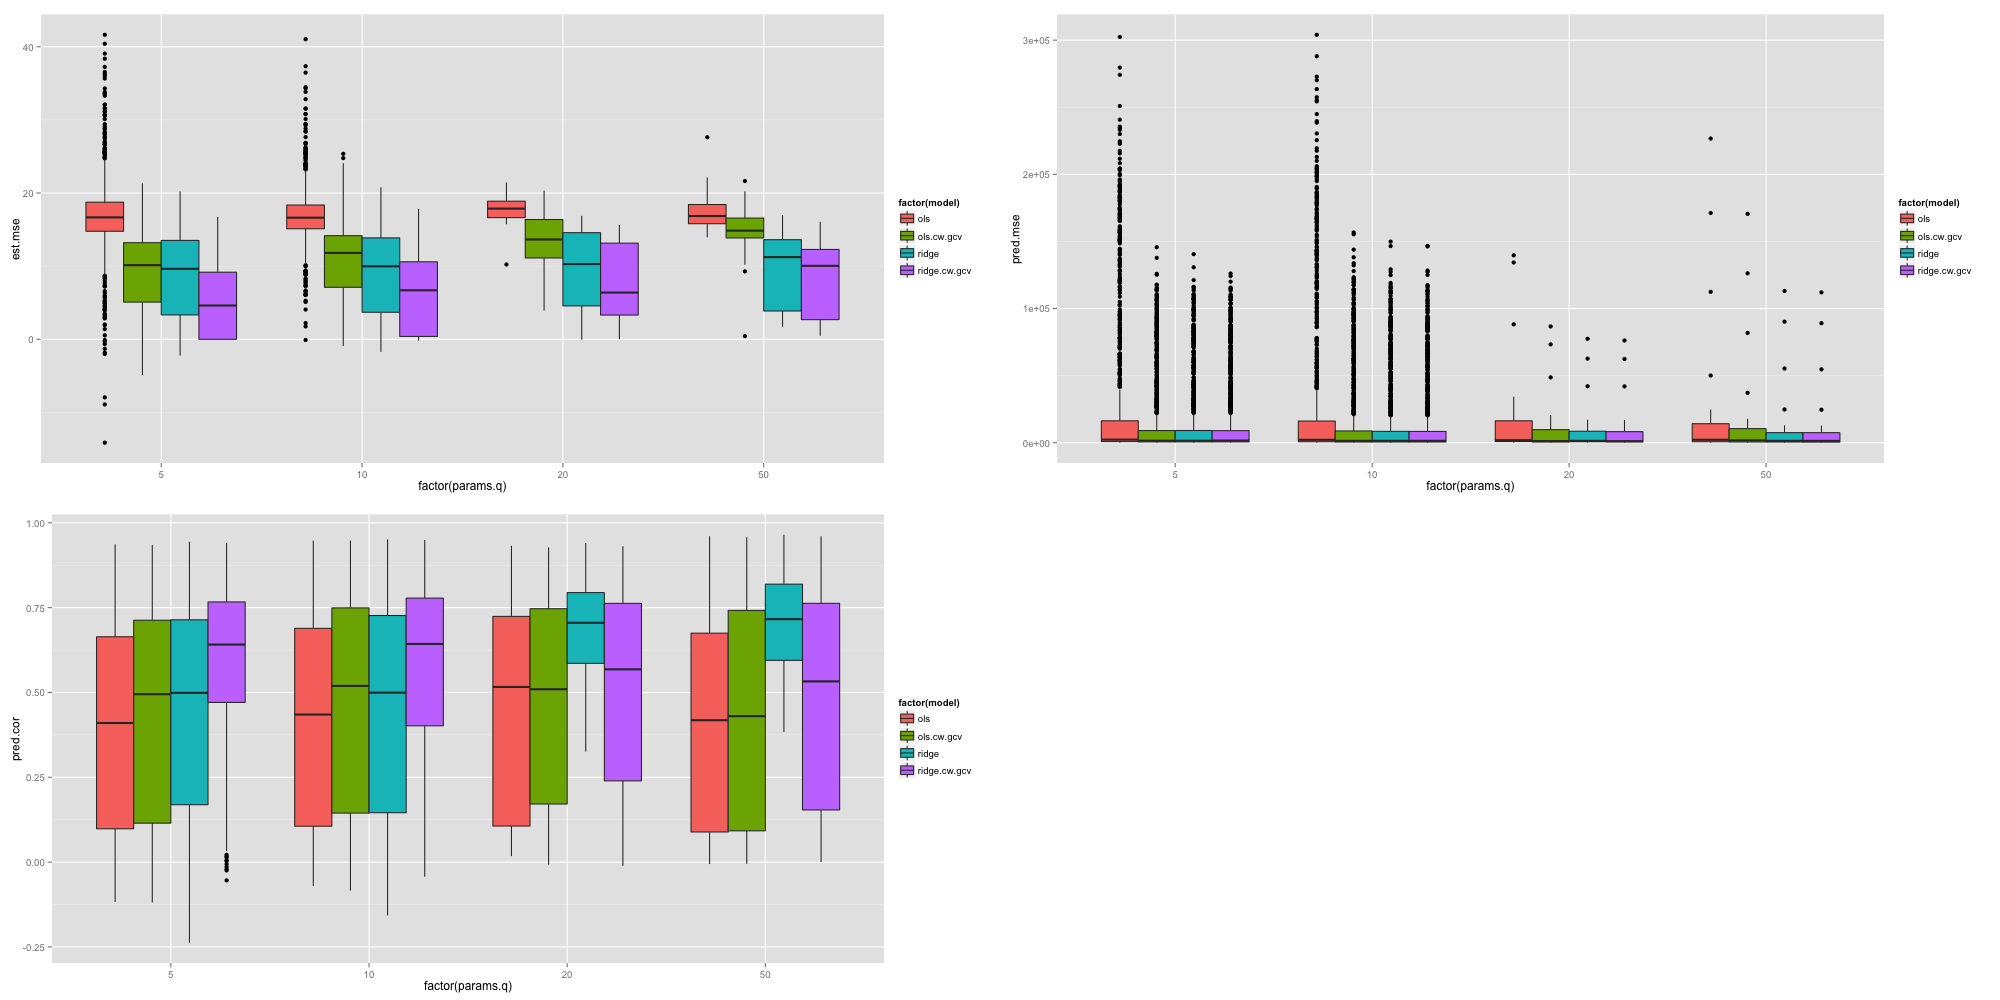

In [32]:
%%R -w 2000 -h 1000
df1 <- subset(df, params.p==51 & params.n==200)
p1<-ggplot(data=df1,aes(x=factor(params.q),y=est.mse,fill = factor(model)))+geom_boxplot()
p2<-ggplot(data=df1,aes(x=factor(params.q),y=pred.mse,fill = factor(model)))+geom_boxplot()
p3<-ggplot(data=df1,aes(x=factor(params.q),y=pred.cor,fill = factor(model)))+geom_boxplot()
grid.arrange(p1,p2,p3, nrow = 2, ncol = 2)

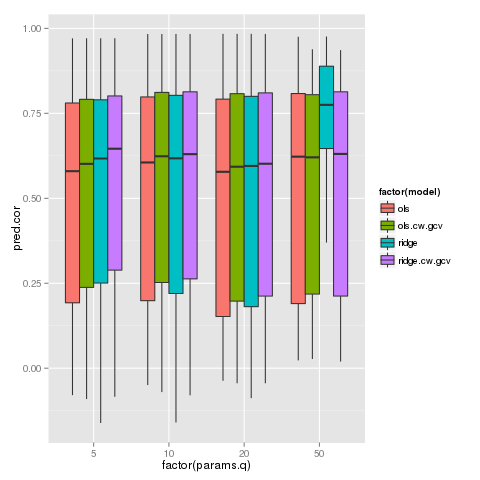

In [83]:
%%R
df1 <- subset(df, params.p ==21)
p1<-ggplot(data=df1,aes(x=factor(params.q),y=pred.cor,fill = factor(model)))+geom_boxplot()
p1